In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

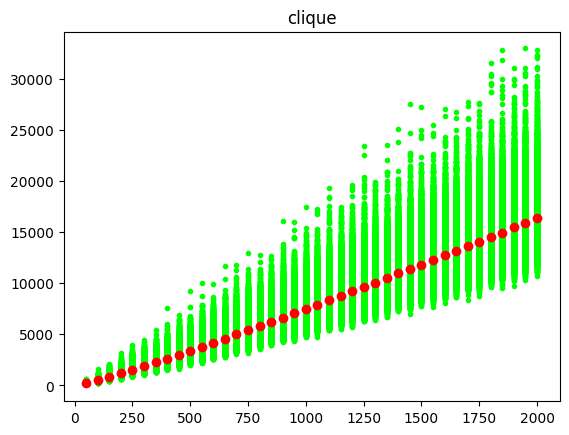

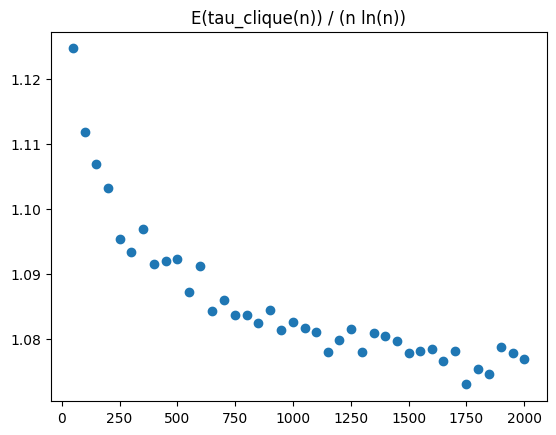

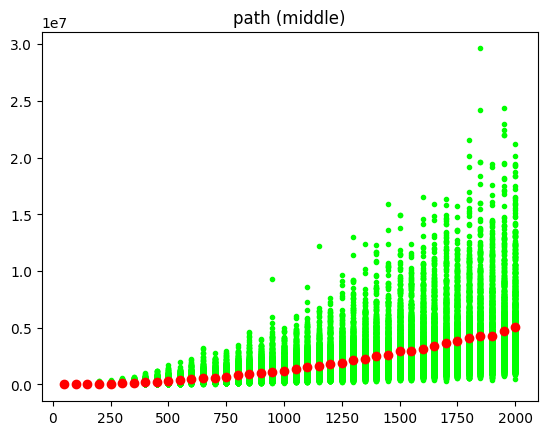

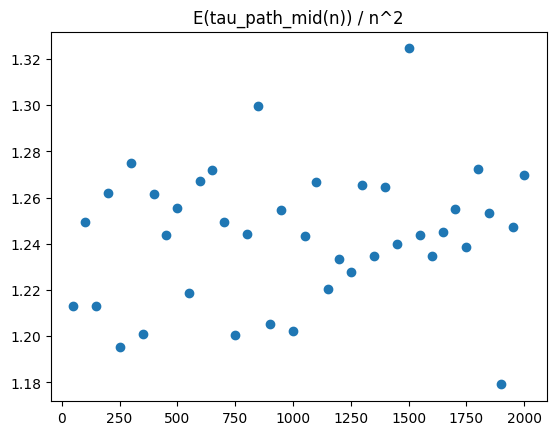

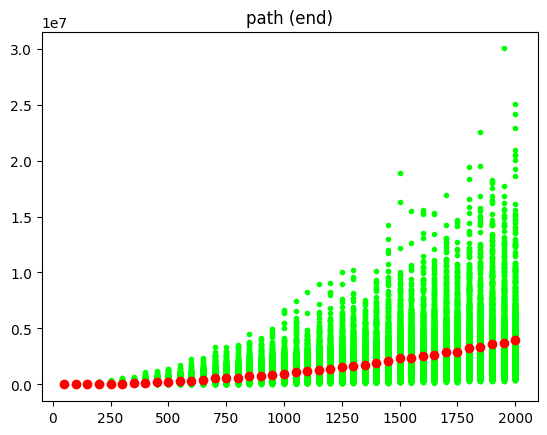

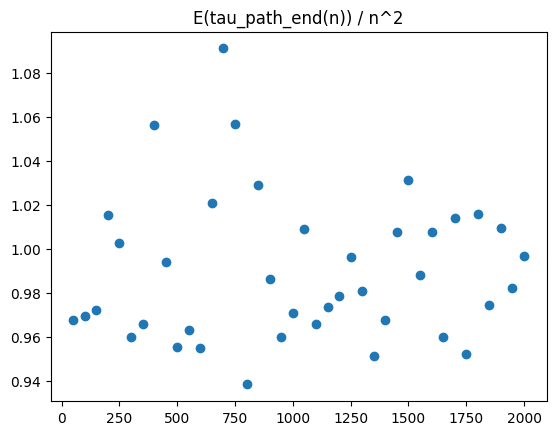

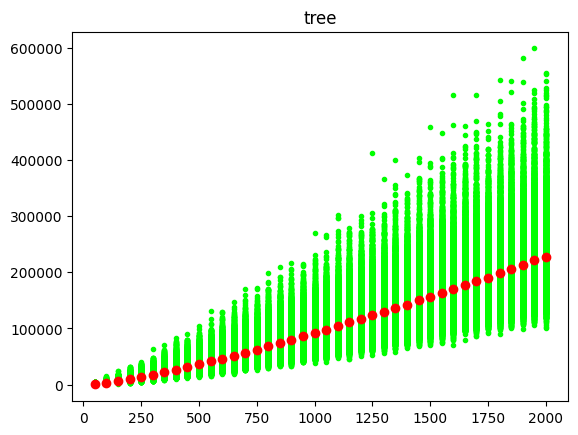

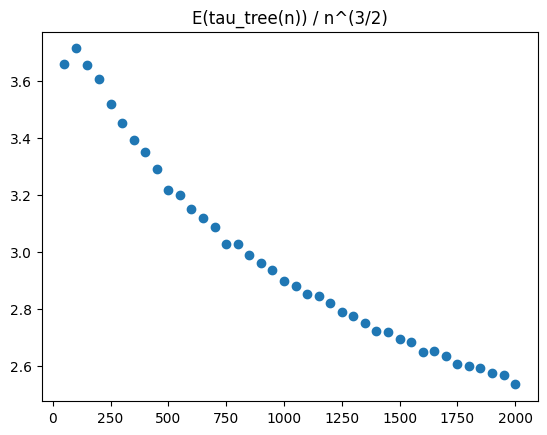

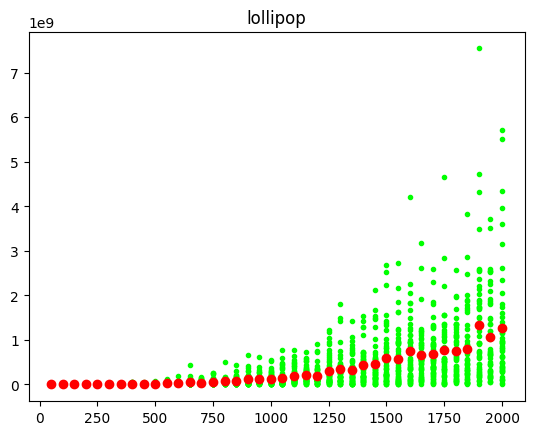

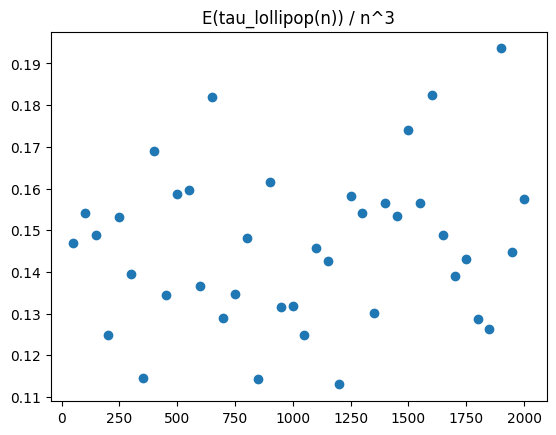

In [5]:
graph_types = list(range(5))
repetitions = [10000, 1000, 1000, 10000, 50]
results_names = ["clique", "path (middle)", "path (end)", "tree", "lollipop"]
average_names = ["E(tau_clique(n)) / (n ln(n))", "E(tau_path_mid(n)) / n^2",
                 "E(tau_path_end(n)) / n^2", "E(tau_tree(n)) / n^(3/2)",
                 "E(tau_lollipop(n)) / n^3"]

X = np.arange(50, 2001, 50, dtype='int') # different graph sizes
N = len(X) # number of diffent sizes

asymptotic_list = [X * np.log(X), X * X, X * X, X * np.sqrt(X), X * X * X]

for gt in graph_types:
    
    X_repeat = np.repeat(X, repetitions[gt])
    
    # read results
    
    results = open(f"results{gt}.txt", "r")
    
    # values array for whole graph
    
    values = np.empty(N*repetitions[gt], dtype='uint64')
    averages = np.empty(N, dtype='uint64')
    
    # indexes
    
    idx = 0
    i = 0
    
    # read a single line
    
    for line in results:
        line_vals = [eval(i) for i in line.rstrip(" \n").split(" ")] # obtain list of singular results
        values[idx : idx + len(line_vals)] = line_vals # concatenate values with line_vals
        averages[i] = sum(line_vals)/len(line_vals) # calculate and append avg
        idx += len(line_vals)
        i += 1
    
    # graph results
    
    plt.scatter(X_repeat, values, c='lime', marker='.')
    plt.scatter(X, averages, c='red', marker='o')
    plt.title(results_names[gt])
    plt.show()
    
    plt.scatter(X, averages / asymptotic_list[gt])
    plt.title(average_names[gt])
    plt.show()
    